In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

In [52]:
ogDf = pd.read_csv('recent-grads.csv')
ogDf.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [53]:
df = ogDf.drop(['Rank', 'Major_code'], axis=1)
# df = ogDf.drop(['Rank', 'Major_code', 'Major', 'Men', 'Women', 'Sample_size'], axis=1)
df.head()

,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [54]:
df['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [55]:
# Append these columns to df
oneHotColumns = pd.get_dummies(df.Major_category, prefix='Major_category')
oneHotColumns.head()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
dfWithOneHot = oneHotColumns.join(df)
medianWithOneHot = oneHotColumns.join(df['Median'])
medianWithOneHot.corr()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Median
Major_category_Agriculture & Natural Resources,1.000000,-0.054539,-0.073497,-0.070602,-0.038106,-0.064542,-0.079071,-0.111154,-0.067621,-0.076317,-0.050863,-0.018886,-0.042730,-0.061350,-0.058024,-0.058024,-0.070416
Major_category_Arts,-0.054539,1.000000,-0.065338,-0.062765,-0.033876,-0.057378,-0.070293,-0.098815,-0.060115,-0.067845,-0.045217,-0.016790,-0.037987,-0.054539,-0.051582,-0.051582,-0.136481
Major_category_Biology & Life Science,-0.073497,-0.065338,1.000000,-0.084582,-0.045651,-0.077322,-0.094727,-0.133163,-0.081011,-0.091429,-0.060934,-0.022626,-0.051191,-0.073497,-0.069513,-0.069513,-0.096775
Major_category_Business,-0.070602,-0.062765,-0.084582,1.000000,-0.043853,-0.074276,-0.090996,-0.127917,-0.077820,-0.087827,-0.058534,-0.021734,-0.049175,-0.070602,-0.066775,-0.066775,0.084415
Major_category_Communications & Journalism,-0.038106,-0.033876,-0.045651,-0.043853,1.000000,-0.040089,-0.049113,-0.069041,-0.042001,-0.047403,-0.031592,-0.011731,-0.026541,-0.038106,-0.036040,-0.036040,-0.076021
Major_category_Computers & Mathematics,-0.064542,-0.057378,-0.077322,-0.074276,-0.040089,1.000000,-0.083186,-0.116938,-0.071140,-0.080289,-0.053510,-0.019869,-0.044954,-0.064542,-0.061043,-0.061043,0.059102
Major_category_Education,-0.079071,-0.070293,-0.094727,-0.090996,-0.049113,-0.083186,1.000000,-0.143261,-0.087154,-0.098362,-0.065555,-0.024341,-0.055073,-0.079071,-0.074784,-0.074784,-0.217758
Major_category_Engineering,-0.111154,-0.098815,-0.133163,-0.127917,-0.069041,-0.116938,-0.143261,1.000000,-0.122517,-0.138272,-0.092154,-0.034218,-0.077419,-0.111154,-0.105128,-0.105128,0.676121
Major_category_Health,-0.067621,-0.060115,-0.081011,-0.077820,-0.042001,-0.071140,-0.087154,-0.122517,1.000000,-0.084119,-0.056063,-0.020817,-0.047099,-0.067621,-0.063955,-0.063955,-0.079405
Major_category_Humanities & Liberal Arts,-0.076317,-0.067845,-0.091429,-0.087827,-0.047403,-0.080289,-0.098362,-0.138272,-0.084119,1.000000,-0.063272,-0.023494,-0.053155,-0.076317,-0.072180,-0.072180,-0.221939


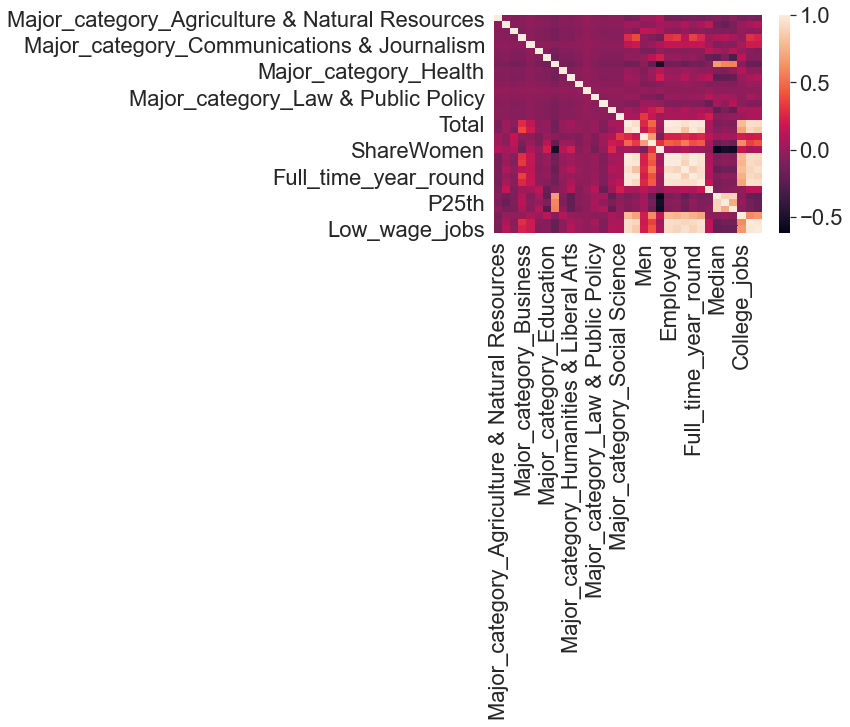

In [57]:
sns.heatmap(dfWithOneHot.corr());

In [58]:
df.describe()

,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050723,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.068272,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087599,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [59]:
oneHotColumns.describe()

,Major_category_Agriculture & Natural Resources,Major_category_Arts,Major_category_Biology & Life Science,Major_category_Business,Major_category_Communications & Journalism,Major_category_Computers & Mathematics,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.057803,0.046243,0.080925,0.075145,0.023121,0.063584,0.092486,0.167630,0.069364,0.086705,0.040462,0.005780,0.028902,0.057803,0.052023,0.052023
std,0.234049,0.210620,0.273511,0.264390,0.150725,0.244718,0.290551,0.374622,0.254810,0.282219,0.197613,0.076029,0.168017,0.234049,0.222718,0.222718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# categorize salary as separate column
df.loc[(df['Median'] >= 20) & (df['Median'] < 30), 'Median_category'] = '20-30'
df.loc[(df['Median'] >= 30) & (df['Median'] < 40), 'Median_category'] = '30-40'
df.loc[(df['Median'] >= 40) & (df['Median'] < 50), 'Median_category'] = '40-50'
df.loc[(df['Median'] >= 50) & (df['Median'] < 60), 'Median_category'] = '50-60'
df.loc[(df['Median'] >= 60) & (df['Median'] < 70), 'Median_category'] = '60-70'
df.loc[(df['Median'] >= 70) & (df['Median'] < 80), 'Median_category'] = '70-80'
df.loc[(df['Median'] >= 80) & (df['Median'] < 90), 'Median_category'] = '80-90'
df.loc[(df['Median'] >= 90) & (df['Median'] < 100), 'Median_category'] = '90-100K'
df.loc[(df['Median'] >= 100) & (df['Median'] < 110), 'Median_category'] = '100-110K'
df.loc[(df['Median'] >= 110) & (df['Median'] < 120), 'Median_category'] = '110-120K'

In [61]:
# add number of majors in each category as separate column
df.loc[df['Major_category'] == 'Engineering', 'Num_majors'] = 29
df.loc[df['Major_category'] == 'Education', 'Num_majors'] = 16
df.loc[df['Major_category'] == 'Humanities & Liberal Arts', 'Num_majors'] = 15
df.loc[df['Major_category'] == 'Biology & Life Science', 'Num_majors'] = 14
df.loc[df['Major_category'] == 'Business', 'Num_majors'] = 13
df.loc[df['Major_category'] == 'Health', 'Num_majors'] = 12
df.loc[df['Major_category'] == 'Computers & Mathematics', 'Num_majors'] = 11
df.loc[df['Major_category'] == 'Agriculture & Natural Resources', 'Num_majors'] = 10
df.loc[df['Major_category'] == 'Physical Sciences', 'Num_majors'] = 10
df.loc[df['Major_category'] == 'Psychology & Social Work', 'Num_majors'] = 9
df.loc[df['Major_category'] == 'Social Science', 'Num_majors'] = 9
df.loc[df['Major_category'] == 'Arts', 'Num_majors'] = 8
df.loc[df['Major_category'] == 'Industrial Arts & Consumer Services', 'Num_majors'] = 7
df.loc[df['Major_category'] == 'Law & Public Policy', 'Num_majors'] = 5
df.loc[df['Major_category'] == 'Communications & Journalism', 'Num_majors'] = 4
df.loc[df['Major_category'] == 'Interdisciplinary', 'Num_majors'] = 1


In [62]:
perc_samp = df['Sample_size']/df['Total']
perc_employed =  df['Employed']/df['Total']
perc_unemployed =  df['Unemployed']/df['Total']
perc_college =  df['College_jobs']/df['Total']
perc_non_college =  df['Non_college_jobs']/df['Total']
perc_low_wage =  df['Low_wage_jobs']/df['Total']

In [63]:
df['Percent_sample_size'] = perc_samp
df['Percent_employed'] = perc_employed
df['Percent_unemployed'] = perc_unemployed
df['Percent_college'] = perc_college
df['Percent_non_college'] = perc_non_college
df['Percent_low_wage'] = perc_low_wage

In [64]:
df.head()

,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,...,Non_college_jobs,Low_wage_jobs,Median_category,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage
0,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,1849,270,...,364,193,NaN,29.0,0.015391,0.844805,0.015819,0.655836,0.155622,0.082514
1,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,556,170,...,257,50,NaN,29.0,0.009259,0.846561,0.112434,0.462963,0.339947,0.066138
2,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,558,133,...,176,0,NaN,29.0,0.003505,0.757009,0.018692,0.532710,0.205607,0.000000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,1069,150,...,102,0,NaN,29.0,0.012719,0.602544,0.031797,0.420509,0.081081,0.000000
4,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,23170,5180,...,4440,972,NaN,29.0,0.008958,0.796466,0.051829,0.567700,0.137632,0.030130


In [65]:
df.corr()

,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,...,College_jobs,Non_college_jobs,Low_wage_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage
Total,1.000000,0.945662,0.262871,0.481571,0.053814,0.996221,0.989358,0.950351,0.981145,0.974804,...,0.800798,0.941337,0.935599,-0.134010,0.000863,0.052774,0.082382,-0.141127,0.053667,0.106416
Sample_size,0.945662,1.000000,0.174730,0.342827,0.013510,0.964462,0.978396,0.824824,0.985235,0.918059,...,0.701704,0.915464,0.860319,-0.137567,0.122641,0.128115,0.081839,-0.179773,0.086796,0.085314
Men,0.262871,0.174730,1.000000,0.673249,-0.112655,0.234249,0.232432,0.269294,0.218846,0.266298,...,0.215923,0.187386,0.214532,-0.034888,-0.159278,-0.153402,0.097123,-0.057765,-0.103458,-0.006362
Women,0.481571,0.342827,0.673249,1.000000,0.296876,0.463872,0.428955,0.554862,0.409465,0.439950,...,0.611389,0.359267,0.423866,-0.150336,-0.133909,-0.039654,0.028141,0.038991,-0.030830,0.062254
ShareWomen,0.053814,0.013510,-0.112655,0.296876,1.000000,0.056304,0.033038,0.114114,0.024042,0.028328,...,0.151148,0.041714,0.076406,-0.410448,-0.164587,0.076269,-0.029003,0.016546,0.148686,0.290559
Employed,0.996221,0.964462,0.234249,0.463872,0.056304,1.000000,0.995838,0.934528,0.991047,0.968900,...,0.797534,0.941326,0.927224,-0.137450,0.024073,0.081507,0.077433,-0.137668,0.058709,0.103898
Full_time,0.989358,0.978396,0.232432,0.428955,0.033038,0.995838,1.000000,0.900877,0.998203,0.960102,...,0.772515,0.933124,0.904852,-0.123526,0.045971,0.088278,0.074392,-0.143514,0.046921,0.079619
Part_time,0.950351,0.824824,0.269294,0.554862,0.114114,0.934528,0.900877,1.000000,0.880855,0.945094,...,0.804987,0.909634,0.951593,-0.174728,-0.073700,0.013514,0.103077,-0.133035,0.101508,0.189011
Full_time_year_round,0.981145,0.985235,0.218846,0.409465,0.024042,0.991047,0.998203,0.880855,1.000000,0.950711,...,0.755254,0.928874,0.892847,-0.124521,0.061513,0.097857,0.070998,-0.148849,0.049170,0.071685
Unemployed,0.974804,0.918059,0.266298,0.439950,0.028328,0.968900,0.960102,0.945094,0.950711,1.000000,...,0.713804,0.956532,0.955388,-0.159641,0.006221,0.033627,0.168162,-0.211603,0.111083,0.153065


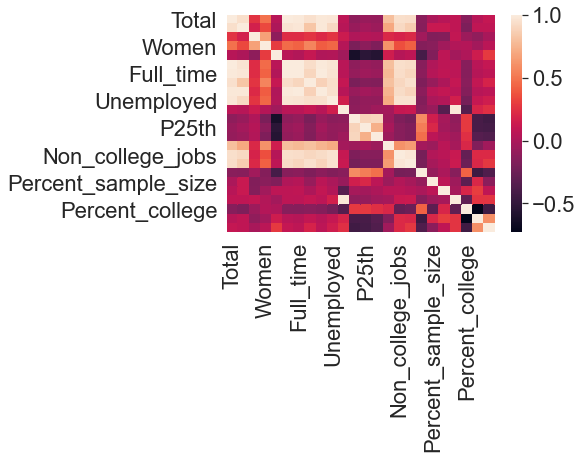

In [66]:
sns.heatmap(df.corr());

In [67]:
t = df[['Percent_low_wage','Percent_college','Percent_non_college','Full_time','Num_majors','Total','ShareWomen','Women','Employed','Part_time','Unemployment_rate','Unemployed','P25th','P75th','Non_college_jobs','Low_wage_jobs','Percent_sample_size','Percent_unemployed']]
       


In [68]:
t.corr()

,Percent_low_wage,Percent_college,Percent_non_college,Full_time,Num_majors,Total,ShareWomen,Women,Employed,Part_time,Unemployment_rate,Unemployed,P25th,P75th,Non_college_jobs,Low_wage_jobs,Percent_sample_size,Percent_unemployed
Percent_low_wage,1.000000,-0.441216,0.596857,0.079619,-0.366827,0.106416,0.290559,0.062254,0.103898,0.189011,0.244502,0.153065,-0.417901,-0.363135,0.219376,0.279670,-0.121980,0.265454
Percent_college,-0.441216,1.000000,-0.728526,-0.143514,0.432751,-0.141127,0.016546,0.038991,-0.137668,-0.133035,-0.348043,-0.211603,0.289363,0.250238,-0.277989,-0.253211,-0.316093,-0.302530
Percent_non_college,0.596857,-0.728526,1.000000,0.046921,-0.453103,0.053667,0.148686,-0.030830,0.058709,0.101508,0.192164,0.111083,-0.398447,-0.339400,0.221887,0.207729,0.204996,0.269687
Full_time,0.079619,-0.143514,0.046921,1.000000,-0.123526,0.989358,0.033038,0.428955,0.995838,0.900877,0.056298,0.960102,-0.042957,-0.065073,0.933124,0.904852,0.045971,0.074392
Num_majors,-0.366827,0.432751,-0.453103,-0.123526,1.000000,-0.134010,-0.410448,-0.150336,-0.137450,-0.174728,-0.132542,-0.159641,0.530118,0.475914,-0.202611,-0.201124,-0.082203,-0.135304
Total,0.106416,-0.141127,0.053667,0.989358,-0.134010,1.000000,0.053814,0.481571,0.996221,0.950351,0.072919,0.974804,-0.072723,-0.086737,0.941337,0.935599,0.000863,0.082382
ShareWomen,0.290559,0.016546,0.148686,0.033038,-0.410448,0.053814,1.000000,0.296876,0.056304,0.114114,-0.034517,0.028328,-0.527633,-0.553608,0.041714,0.076406,-0.164587,-0.029003
Women,0.062254,0.038991,-0.030830,0.428955,-0.150336,0.481571,0.296876,1.000000,0.463872,0.554862,0.042954,0.439950,-0.118780,-0.168943,0.359267,0.423866,-0.133909,0.028141
Employed,0.103898,-0.137668,0.058709,0.995838,-0.137450,0.996221,0.056304,0.463872,1.000000,0.934528,0.060937,0.968900,-0.067514,-0.087560,0.941326,0.927224,0.024073,0.077433
Part_time,0.189011,-0.133035,0.101508,0.900877,-0.174728,0.950351,0.114114,0.554862,0.934528,1.000000,0.102653,0.945094,-0.153509,-0.158220,0.909634,0.951593,-0.073700,0.103077


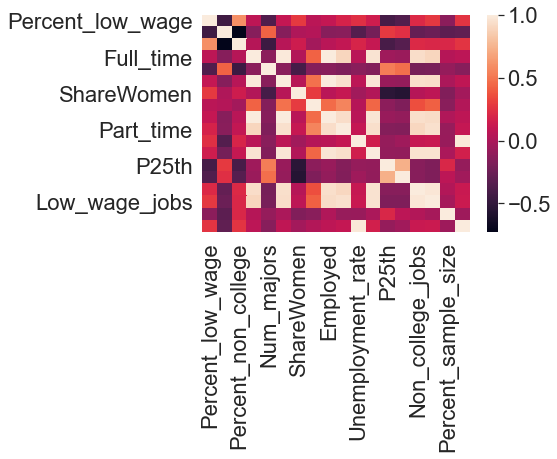

In [69]:
sns.heatmap(t.corr());

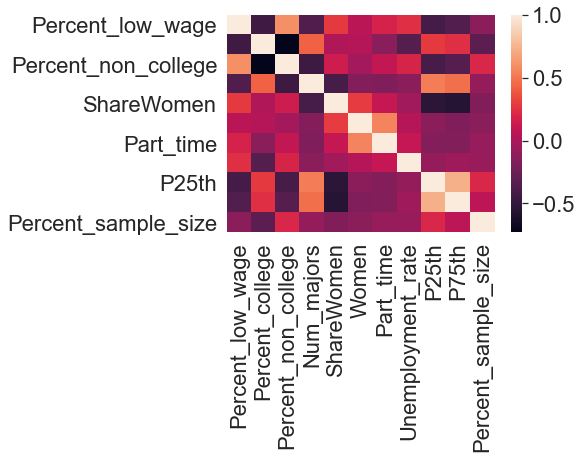

In [70]:
temp = t.drop(['Low_wage_jobs','Non_college_jobs','Total', 'Percent_unemployed', 'Employed', 'Unemployed', 'Full_time'], axis=1)
sns.heatmap(temp.corr());

In [71]:
hi = df.drop(['Low_wage_jobs','Non_college_jobs','Total', 'Percent_unemployed', 'Employed', 'Unemployed', 'Full_time'], axis=1)
hi.corr()

,Sample_size,Men,Women,ShareWomen,Part_time,Full_time_year_round,Unemployment_rate,Median,P25th,P75th,College_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_college,Percent_non_college,Percent_low_wage
Sample_size,1.000000,0.174730,0.342827,0.013510,0.824824,0.985235,0.053229,-0.067578,-0.025229,-0.055737,0.701704,-0.137567,0.122641,0.128115,-0.179773,0.086796,0.085314
Men,0.174730,1.000000,0.673249,-0.112655,0.269294,0.218846,0.138844,0.022419,0.045062,0.032647,0.215923,-0.034888,-0.159278,-0.153402,-0.057765,-0.103458,-0.006362
Women,0.342827,0.673249,1.000000,0.296876,0.554862,0.409465,0.042954,-0.185242,-0.118780,-0.168943,0.611389,-0.150336,-0.133909,-0.039654,0.038991,-0.030830,0.062254
ShareWomen,0.013510,-0.112655,0.296876,1.000000,0.114114,0.024042,-0.034517,-0.614711,-0.527633,-0.553608,0.151148,-0.410448,-0.164587,0.076269,0.016546,0.148686,0.290559
Part_time,0.824824,0.269294,0.554862,0.114114,1.000000,0.880855,0.102653,-0.190124,-0.153509,-0.158220,0.804987,-0.174728,-0.073700,0.013514,-0.133035,0.101508,0.189011
Full_time_year_round,0.985235,0.218846,0.409465,0.024042,0.880855,1.000000,0.050205,-0.072982,-0.033034,-0.056932,0.755254,-0.124521,0.061513,0.097857,-0.148849,0.049170,0.071685
Unemployment_rate,0.053229,0.138844,0.042954,-0.034517,0.102653,0.050205,1.000000,-0.110655,-0.082641,-0.043631,-0.022515,-0.132542,-0.072087,-0.343489,-0.348043,0.192164,0.244502
Median,-0.067578,0.022419,-0.185242,-0.614711,-0.190124,-0.072982,-0.110655,1.000000,0.891683,0.901923,-0.050276,0.587267,0.161847,-0.014393,0.286430,-0.404364,-0.436853
P25th,-0.025229,0.045062,-0.118780,-0.527633,-0.153509,-0.033034,-0.082641,0.891683,1.000000,0.734491,-0.011554,0.530118,0.208592,-0.026749,0.289363,-0.398447,-0.417901
P75th,-0.055737,0.032647,-0.168943,-0.553608,-0.158220,-0.056932,-0.043631,0.901923,0.734491,1.000000,-0.056481,0.475914,0.068505,0.008567,0.250238,-0.339400,-0.363135


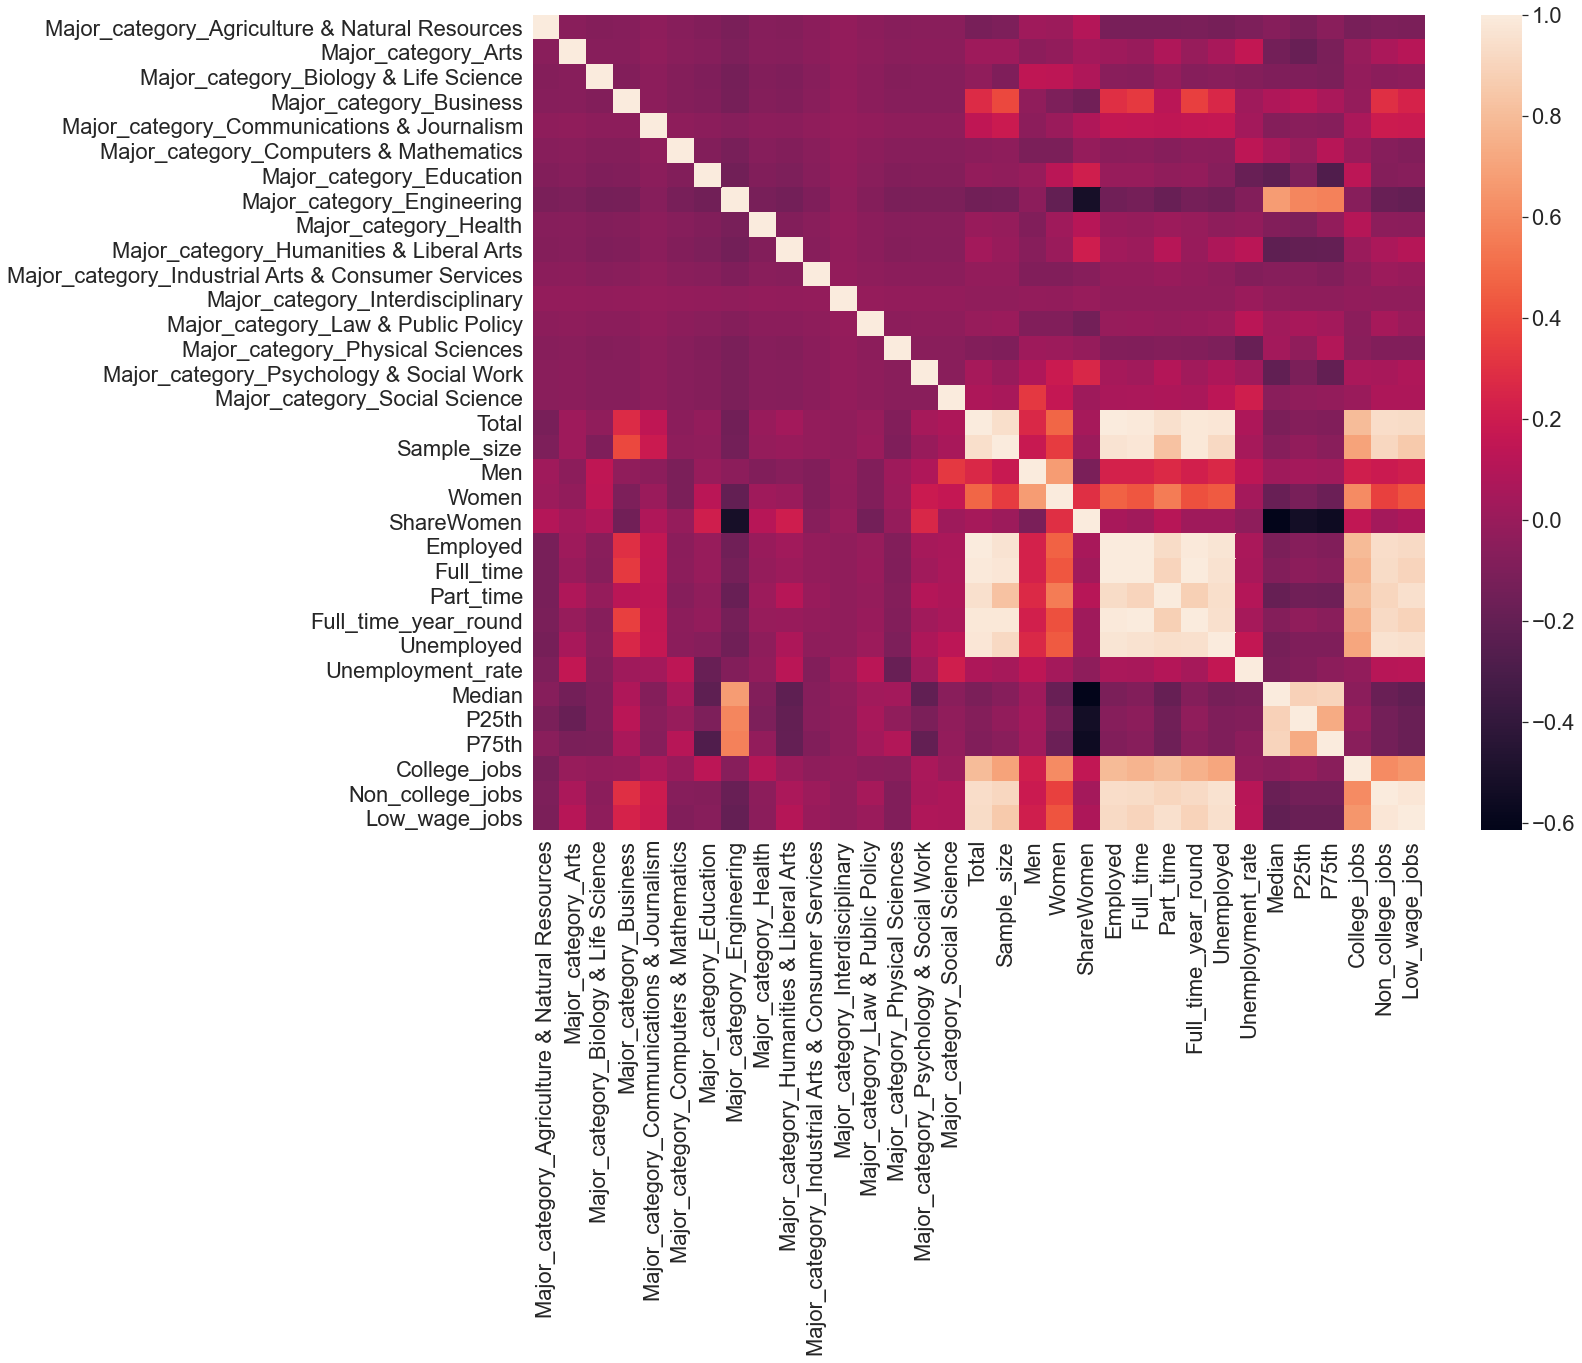

In [72]:
plt.subplots(figsize=(20,15))
svm = sns.heatmap(dfWithOneHot.corr());
figure = svm.get_figure()    
# figure.savefig('svm_conf.png')

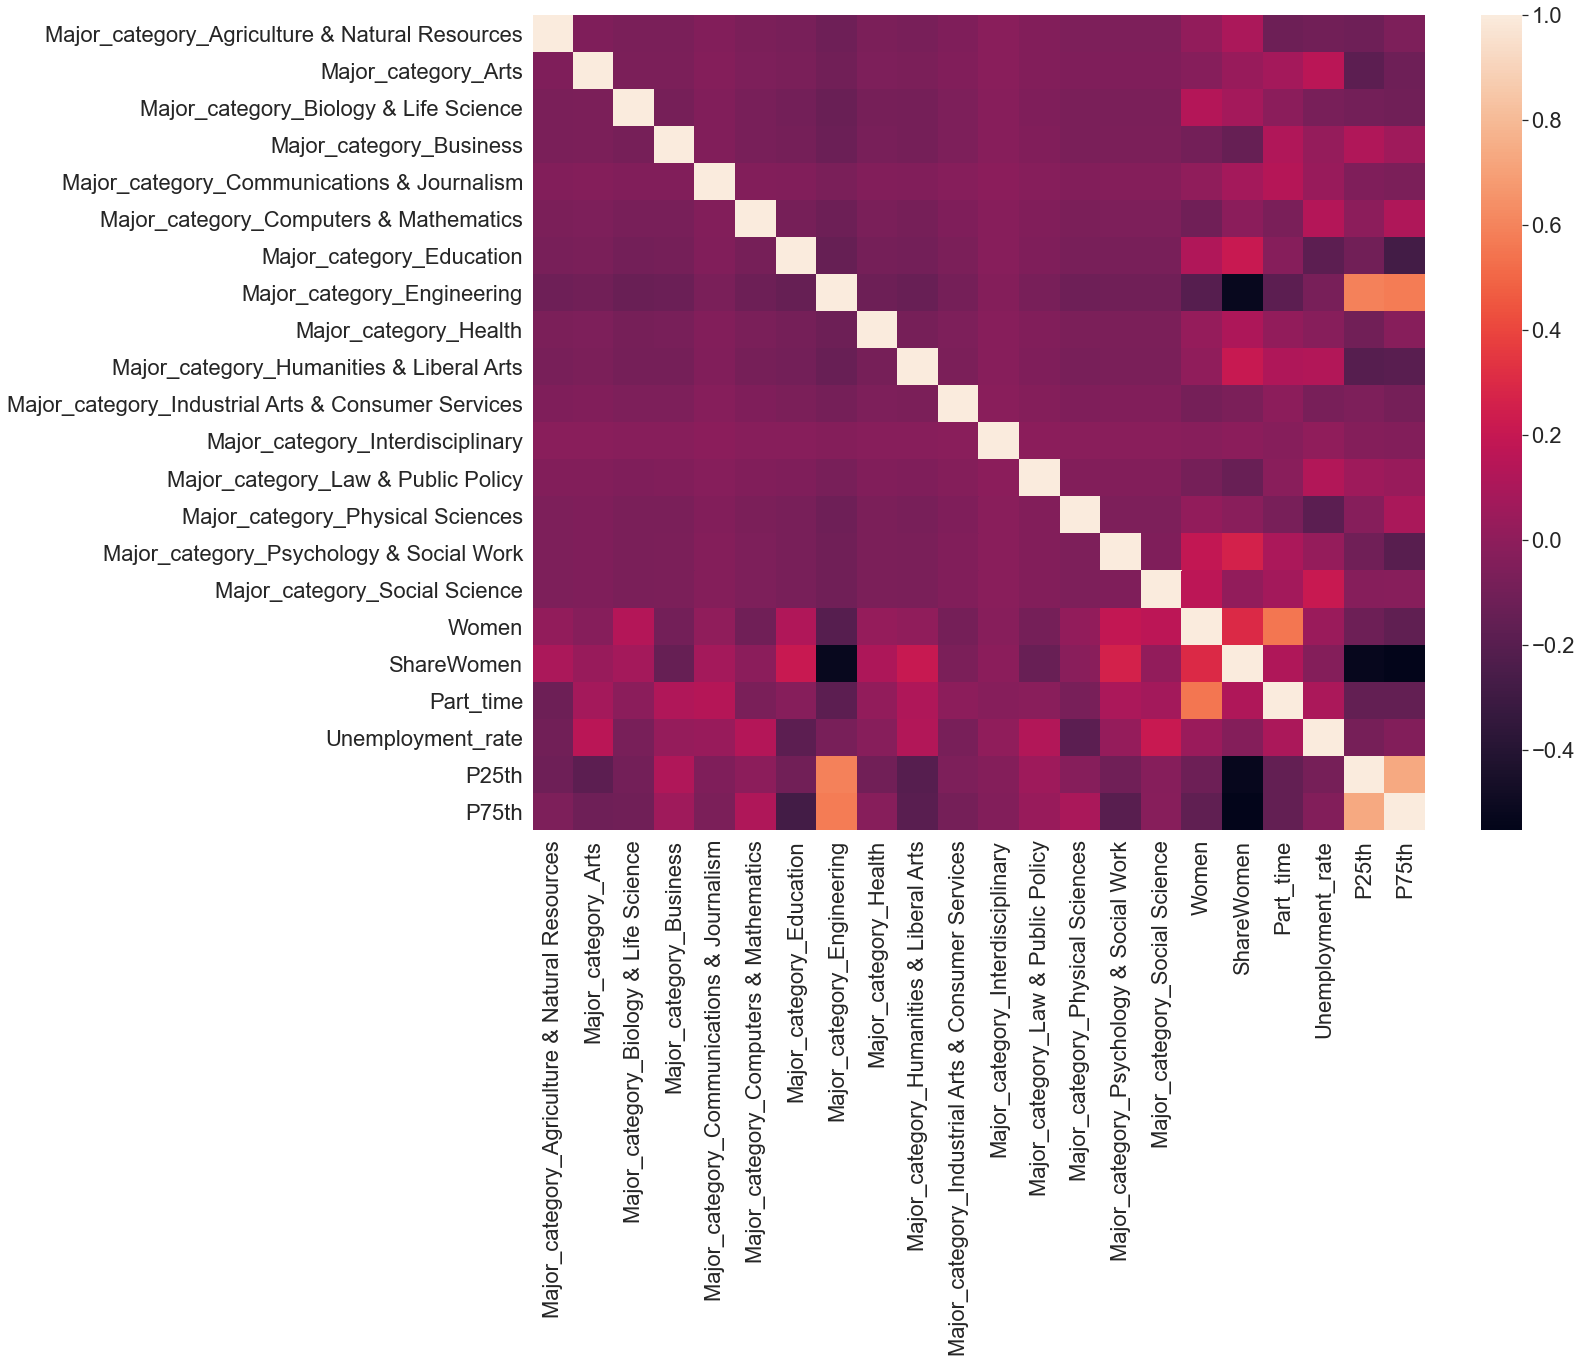

In [74]:
plt.subplots(figsize=(20,15))
temp = dfWithOneHot.drop(['Median','Men','Sample_size','Full_time_year_round','College_jobs','Low_wage_jobs','Non_college_jobs','Total', 'Employed', 'Unemployed', 'Full_time'], axis=1)
sns.heatmap(temp.corr());